In [3]:
import networkx as nx
from pymatgen.core.structure import Structure
import os
os.chdir('/home/lucasperea/Documents/GithubRep/GraphMaterials/')
from GraphFunc.ZeoDataframeFunction import ZeoDataframe
from GraphFunc.ConexionFunction import Conexion
from pymatgen.io.cif import CifWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from copy import deepcopy

In [202]:
from networkx.relabel import relabel_nodes
from pymatgen.core.structure import Structure

In [207]:
stu = Structure.from_file('./CifFiles/AFX.cif')
stu.lattice

Lattice
    abc : 13.674 13.674 19.695
 angles : 90.0 90.0 119.99999999999999
 volume : 3189.17071865996
      A : 13.674 0.0 8.372910165770453e-16
      B : -6.836999999999996 11.842031371348416 8.372910165770453e-16
      C : 0.0 0.0 19.695

In [220]:
stu = Structure.from_file('./CifFiles/EDI.cif')
stu.lattice
# np.array([-6.836999999999996, 11.842031371348416, 0])/13.674

Lattice
    abc : 6.926 6.926 6.41
 angles : 90.0 90.0 90.0
 volume : 307.48434116
      A : 6.926 0.0 4.240951865447284e-16
      B : 1.1137857471660386e-15 6.926 4.240951865447284e-16
      C : 0.0 0.0 6.41

In [256]:
import itertools
from itertools import combinations, combinations_with_replacement
r = 2
# A = []
# for i in range(r+1):
#     if i == 0:
#         A.append(i)
#     else:
#         A.append(i)
#         A.append(-i)
        
A = []
a, b, c = [6.926,0,0]
e, d, f = [0,6.926,0]
g, h, l = [0,0,6.41]
for i in range(r+1):
    for j in range(r+1):
        for k in range(r+1):
            A.append(np.array([a,b,c])*i + np.array([e,d,f])*j + np.array([g,h,l])*k)
            A.append(np.array([-a,b,c])*i + np.array([e,d,f])*j + np.array([g,h,l])*k)
            A.append(np.array([-a,b,c])*i + np.array([e,-d,f])*j + np.array([g,h,l])*k)
            A.append(np.array([a,b,c])*i + np.array([e,-d,f])*j + np.array([g,h,l])*k)
            A.append(np.array([a,b,c])*i + np.array([e,d,f])*j + np.array([g,h,-l])*k)
            A.append(np.array([-a,b,c])*i + np.array([e,d,f])*j + np.array([g,h,-l])*k)
            A.append(np.array([-a,b,c])*i + np.array([e,-d,f])*j + np.array([g,h,-l])*k)
            A.append(np.array([a,b,c])*i + np.array([e,-d,f])*j + np.array([g,h,-l])*k)
            
vector_pos = []

for vec in A:
    dist_origin = np.sqrt(np.sum(np.power(vec, 2)))

    if dist_origin <= 2*6.926 :
        if list(vec) in vector_pos:
            pass
        else:
            vector_pos.append(list(vec))
    else:
        pass
    
# temp = combinations_with_replacement(A, 3)
# for i in list(temp):
#     permutations = list(itertools.permutations(i))
#     for perm in permutations:
#         dist_origin = np.sqrt(np.sum(np.power(np.array(perm), 2)))
        
#         if dist_origin <= r :
#             if perm in vector_pos:
#                 pass
#             else:
#                 print(perm, dist_origin)
#                 vector_pos.append(perm)
#         else:
#             pass
len(vector_pos)


33

In [250]:
len(vector_pos)

33

In [43]:
pos_order = {}
dist_1 = [np.array([0,0,0]), np.array([1,0,0]), np.array([-1, 0,0]), np.array([0,1,0]), 
          np.array([0,  -1,  0]), np.array([ 0, 0,  1]), np.array([ 0,  0, -1])]
i = 0
for vector in dist_1:
    name = str(vector[0]) + str(vector[1]) + str(vector[2]) 
    pos_order[name] = i
    i += 1
six_faces_neigh = [np.array([1,0,0]), np.array([-1, 0,0]), np.array([0,1,0]), 
          np.array([0,  -1,  0]), np.array([ 0, 0,  1]), np.array([ 0,  0, -1])]


# [np.array([0,0,0]), np.array([1,0,0]), np.array([-1, 0,0]), np.array([0,1,0]),
#                    np.array([0,  -1,  0]), np.array([ 0, 0,  1]), np.array([ 0,  0, -1])]

dist_2 = [[1,0,0], [0, 1, 0], [1,1,0], [-1,0,0], [0, -1, 0], [-1,-1,0], [-1, 1, 0], [1, -1, 0], [0,0,0],
         [1,0,-1], [0, 1, -1], [1,1,-1], [-1,0,-1], [0, -1, -1], [-1,-1,-1], [-1, 1, -1], [1, -1, -1], [0,0,-1],
         [1,0,1], [0, 1, 1], [1,1,1], [-1,0,1], [0, -1, 1], [-1,-1,1], [-1, 1, 1], [1, -1, 1], [0,0,1]]



In [6]:
path_nt2 = './Netwrk/EDI.nt2'
box = np.array([6.926, 6.926, 6.410])

In [7]:
G = nx.Graph()
with open(path_nt2) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])
        
                    G.add_node(key, coord=np.array([coord_x, coord_y, coord_z]), rad_max_sph=min_dist_atom,
                              pagerank=1)

    #                 vertex_table = vertex_table.append({'coord_x':coord_x, 'coord_y':coord_y, 'coord_z':coord_z,
    #                                                     'min_dist_atom':min_dist_atom, 'key':key},ignore_index = True)


        x_1 = len(list(range(0,(sorted(list(G.nodes), reverse=True)[0] + 1))))
        
        
        
        if line == 'Edge table:\n':
            

            while line:

                line = f.readline()
                if line == '':
                    break
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if x_sim == 8:
                    G.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + np.array([box[0], 0, 0]),
                               rad_max_sph=G.nodes[destination]['rad_max_sph'], pagerank=1)
                    
                    G.add_edge(origin, destination + x_1, rad_max_sph=larger_radius)
                    print(destination + x_1)
                else:
                    if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                        G.add_edge(origin, destination, rad_max_sph=larger_radius)
                        
                    else:
                        pass

In [120]:
graph_mod= {}
key_plus = sorted(list(G.nodes), reverse=True)[0] + 1

for vector in dist_1:
    name = str(vector[0])+str(vector[1])+str(vector[2])
    graph_mod[name] = deepcopy(G)
    
    mapping_name = {}
    multiplier = pos_order[name]
    for node in graph_mod[name].nodes:
        graph_mod[name].nodes[node]['coord'] += box*vector
        mapping_name[node] = node + key_plus*multiplier
    relabel_nodes(graph_mod[name], mapping=mapping_name, copy=False)
    

    
    

cell_list = list(graph_mod.keys())
for vector in dist_1:
    for neighbor in six_faces_neigh:
        str_neighbor = str(neighbor[0]) + str(neighbor[1]) + str(neighbor[2]) 
        
        neig_loc = vector + neighbor
        str_neig_loc = str(neig_loc[0])+str(neig_loc[1])+str(neig_loc[2])
        
        if str_neig_loc in cell_list:
            name = str(vector[0])+str(vector[1])+str(vector[2])
            multiplier_origin = pos_order[name]
            multiplier_destination = pos_order[str_neig_loc]
            
            for edge in conx_cell[str_neighbor]:
                edge_1 = edge[0] + multiplier_origin*key_plus
                edge_2 = edge[1] + multiplier_destination*key_plus
                rad_max_sph = edge[2]
                graph_mod[name].add_edge(edge_1, edge_2)
                graph_mod[name].edges[edge_1, edge_2]['rad_max_sph'] = rad_max_sph
            
            
for key in graph_mod:
    print(key, len(graph_mod[key].nodes))

000 127
100 79
-100 79
010 79
0-10 79
001 78
00-1 78


In [110]:
L.nodes

NodeView((1, 0, 3, 4, 6, 8))

In [109]:
L.nodes
L.add_edge(6, 8)
# L.edges[3, 4]['rad_max_sph'] = 7

In [116]:
final = nx.Graph()



for key in graph_mod:
    final.add_nodes_from(graph_mod[key])
    final.add_edges_from(graph_mod[key].edges)
    for node in graph_mod[key].nodes:
        for attr in graph_mod[key].nodes[node]:
            final.nodes[node][attr] = graph_mod[key].nodes[node][attr]
        
    for edge in graph_mod[key].edges:
        for attr in graph_mod[key].edges[edge[0], edge[1]]:
            final.edges[edge][attr] = graph_mod[key].edges[edge][attr] 
  

In [117]:
neigh_dic = {}
for n, nbrs in final.adj.items():
    neigh = []
    for nbr, eattr in nbrs.items():
        neigh.append(nbr)
        
        
    neigh_dic[str(n)] = neigh

In [142]:
sum_radius = {}
for node in final.nodes:
    
    sum_edges = 0
    for nei in neigh_dic[str(node)]:
        
        score = final[node][nei]['rad_max_sph']
        sum_edges += score
    sum_radius[str(node)] = sum_edges

In [165]:
conexion = {}
sub = {}
for node in final.nodes:
    
    sub = {}
    for nei in neigh_dic[str(node)]:
        radius_node = final[node][nei]['rad_max_sph']
        all_radius = sum_radius[str(nei)] 
        sub[str(nei)] = radius_node/all_radius
    conexion[str(node)] = sub
       

In [164]:
neigh_dic['0']
conexion['0']

{'6': 0.27682358309032123,
 '4': 0.2799252547755529,
 '32': 0.29726021552402315,
 '435': 0.1598167744244838,
 '436': 0.1598167744244838}

In [157]:
for node in final.nodes:
    print(sum(conexion[str(node)].values()))

0.9999999999999999
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99999999999999

In [134]:
sum_edges = 0
for nei in neigh_dic['0']:
    print(nei)
    score = final[0][nei]['rad_max_sph']
    sum_edges += score
sum_edges

6
4
32
435
436


7.271648000000001

In [166]:
def pagerank(graph, iteration, conexion, neigh_dic):
        for i in range(iteration):
            last = pagerank_one_iter(graph, conexion, neigh_dic)
        return(last)

def pagerank_one_iter(graph, conexion, neigh_dic):
    node_list = sorted(list(graph.nodes))
    for node in node_list:
        update_pagerank(node, conexion, neigh_dic, graph)
#         graph.normalize_pagerank()
    pagerank_list = np.asarray([graph.nodes[node]['pagerank'] for node in node_list], dtype='float32')
    return pagerank_list

def update_pagerank(selfnode, conexion, neigh_dic, graph):
    in_neighbors = neigh_dic[str(selfnode)] #self.parents
#     print(in_neighbors, selfnode)
    pagerank_sum = sum(graph.nodes[node]['pagerank']*conexion[str(selfnode)][str(node)]
                       for node in in_neighbors)
#     print(selfnode)
    graph.nodes[selfnode]['pagerank'] = pagerank_sum
    
    
info = pagerank(final, 50, conexion, neigh_dic)

In [188]:
info[np.argsort(info)[-1:-8:-1]]
len(info)
node_list = sorted(list(final.nodes))
pagerank_nodes = np.zeros((7,3))
i = 0
for pos in np.argsort(info)[-1:-8:-1]:
#     print(node_list[pos])
    print(final.nodes[node_list[pos]]['coord'])
    pagerank_nodes[i,:] = final.nodes[node_list[pos]]['coord']
    i += 1

[ 3.463 -3.463  3.205]
[3.463 3.463 9.615]
[10.389  3.463  3.205]
[3.463 3.463 3.205]
[-3.463  3.463  3.205]
[ 3.463  3.463 -3.205]
[ 3.463 10.389  3.205]


In [189]:
pagerank_nodes

array([[ 3.463, -3.463,  3.205],
       [ 3.463,  3.463,  9.615],
       [10.389,  3.463,  3.205],
       [ 3.463,  3.463,  3.205],
       [-3.463,  3.463,  3.205],
       [ 3.463,  3.463, -3.205],
       [ 3.463, 10.389,  3.205]])

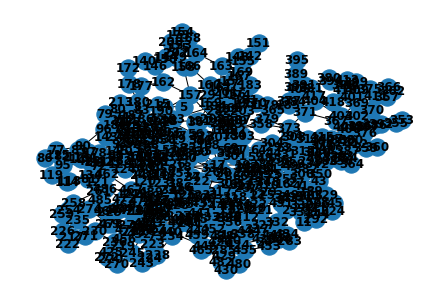

In [87]:
nx.draw(final, with_labels=True, font_weight='bold')

In [ ]:

for node in H.nodes:
    for attr in H.nodes[node]:
        G.nodes[node][attr] = H.nodes[node][attr]
        
for edge in H.edges:
    for attr in H.edges[edge[0], edge[1]]:
        G.edges[edge][attr] = H.edges[edge][attr]    

In [26]:
conx_cell = {}
x_1 = []
x_minus_1 = []
y_1 = []
y_minus_1 = []
z_1 = []
z_minus_1 = []
with open(path_nt2) as f:
    line = ' '

    while line:
        line = f.readline()
        
        if line == 'Edge table:\n':
            while line:

                line = f.readline()
                
                if line == '':
                    break
                    
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                    pass
                else:
                    if x_sim == 1:
                         x_1.append((origin,destination,larger_radius))
                    elif x_sim == -1:
                         x_minus_1.append((origin,destination,larger_radius))
                    elif y_sim == 1:
                         y_1.append((origin,destination,larger_radius))
                    elif y_sim == -1:
                         y_minus_1.append((origin,destination,larger_radius))
                    elif z_sim == 1:
                         z_1.append((origin,destination,larger_radius))
                    elif z_sim == -1:
                         z_minus_1.append((origin,destination,larger_radius))
                        
conx_cell['100'] = x_1
conx_cell['-100'] = x_minus_1
conx_cell['010'] = y_1
conx_cell['0-10'] = y_minus_1
conx_cell['001'] = z_1
conx_cell['00-1'] = z_minus_1

In [114]:
for key in conx_cell:
    print(len(conx_cell[key]))

10
10
10
10
13
13


In [112]:
x_minus_1

[(10, 3, 0.0922282),
 (14, 5, 0.0922282),
 (28, 56, 0.78061),
 (33, 58, 1.10205),
 (35, 57, 1.39808),
 (60, 65, 1.10205),
 (62, 66, 0.78061),
 (67, 67, 0.429155),
 (68, 68, 0.759739),
 (69, 69, 0.429154)]

In [22]:
L = nx.Graph()

In [25]:
L.add_edge(1,0)
L.edges[(1,0)]['weight'] = 5

In [72]:
L.edges

EdgeView([(1, 2)])

In [193]:
pagerank_nodes.shape

(7, 3)

In [74]:
L.add_edge(2,1, weight=0.6)

<IPython.core.display.Javascript object>


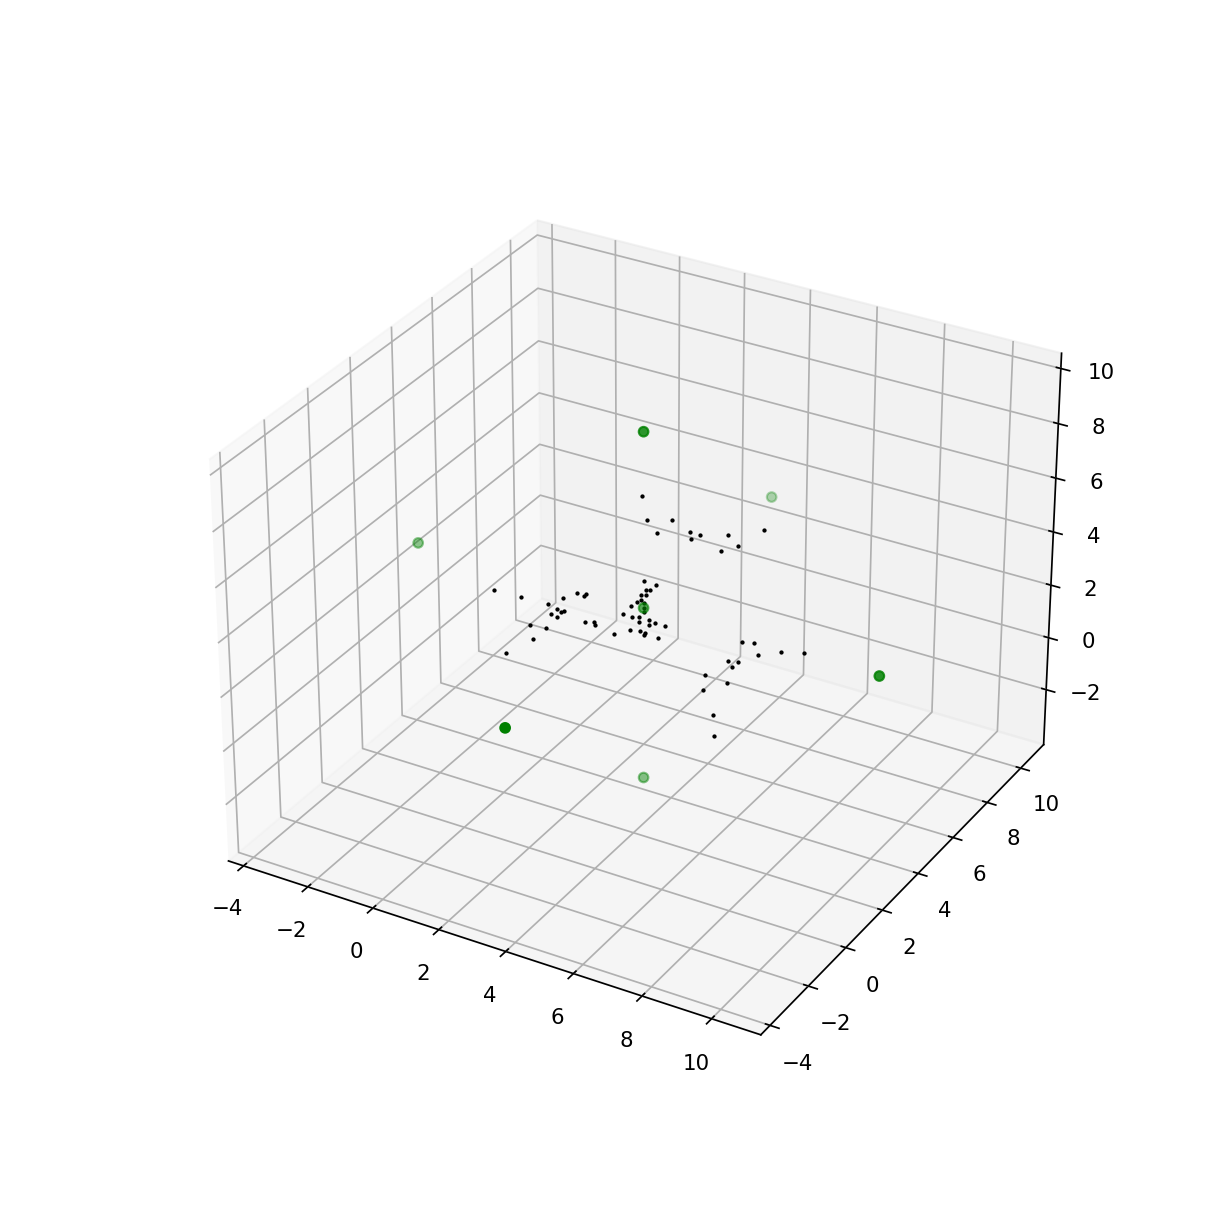

KeyError: 'coord'

In [201]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
# for node in final.nodes:
    
#     ax.scatter(final.nodes[node]['coord'][0], final.nodes[node]['coord'][1], final.nodes[node]['coord'][2], 
#                s=1, c='black')
ax.scatter(pagerank_nodes[:,0], pagerank_nodes[:,1], pagerank_nodes[:,2], s=20, c='green')    
for node in graph_mod['000'].nodes:
    
    ax.scatter(graph_mod['000'].nodes[node]['coord'][0], graph_mod['000'].nodes[node]['coord'][1], graph_mod['000'].nodes[node]['coord'][2], 
               s=1, c='black')

ax.scatter(pagerank_nodes[:,0], pagerank_nodes[:,1], pagerank_nodes[:,2], s=20, c='green')

In [186]:
final.nodes[node]['coord']

array([3.31303, 3.463  , 2.62059])